In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np

In [2]:
# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels, test_labels = to_categorical(train_labels, 10), to_categorical(test_labels, 10)

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(train_images)

In [4]:
# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [5]:
# Correcting the optimizer initialization
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min', min_lr=0.00001)

In [6]:
# Fit model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, reduce_lr],
                    verbose=2)

Epoch 1/50
782/782 - 42s - loss: 1.8409 - accuracy: 0.3701 - val_loss: 1.5028 - val_accuracy: 0.4721 - lr: 0.0010 - 42s/epoch - 53ms/step
Epoch 2/50
782/782 - 30s - loss: 1.3027 - accuracy: 0.5324 - val_loss: 1.2178 - val_accuracy: 0.5748 - lr: 0.0010 - 30s/epoch - 38ms/step
Epoch 3/50
782/782 - 29s - loss: 1.1261 - accuracy: 0.6014 - val_loss: 1.0983 - val_accuracy: 0.6207 - lr: 0.0010 - 29s/epoch - 38ms/step
Epoch 4/50
782/782 - 30s - loss: 1.0175 - accuracy: 0.6419 - val_loss: 1.0535 - val_accuracy: 0.6369 - lr: 0.0010 - 30s/epoch - 38ms/step
Epoch 5/50
782/782 - 29s - loss: 0.9338 - accuracy: 0.6778 - val_loss: 0.9291 - val_accuracy: 0.6898 - lr: 0.0010 - 29s/epoch - 37ms/step
Epoch 6/50
782/782 - 30s - loss: 0.8693 - accuracy: 0.7012 - val_loss: 0.7955 - val_accuracy: 0.7283 - lr: 0.0010 - 30s/epoch - 39ms/step
Epoch 7/50
782/782 - 39s - loss: 0.8209 - accuracy: 0.7173 - val_loss: 0.7401 - val_accuracy: 0.7443 - lr: 0.0010 - 39s/epoch - 49ms/step
Epoch 8/50
782/782 - 40s - loss: 0

In [7]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 4ms/step - loss: 0.4217 - accuracy: 0.8608
Test accuracy: 0.86080002784729


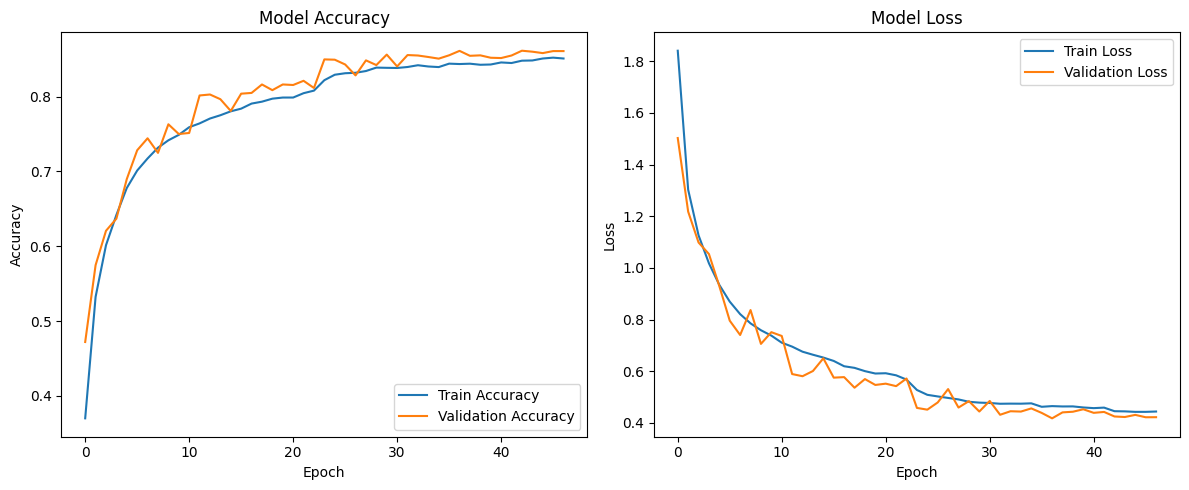

In [8]:
# Plot training history for accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

313/313 [==============================] - 1s 2ms/step


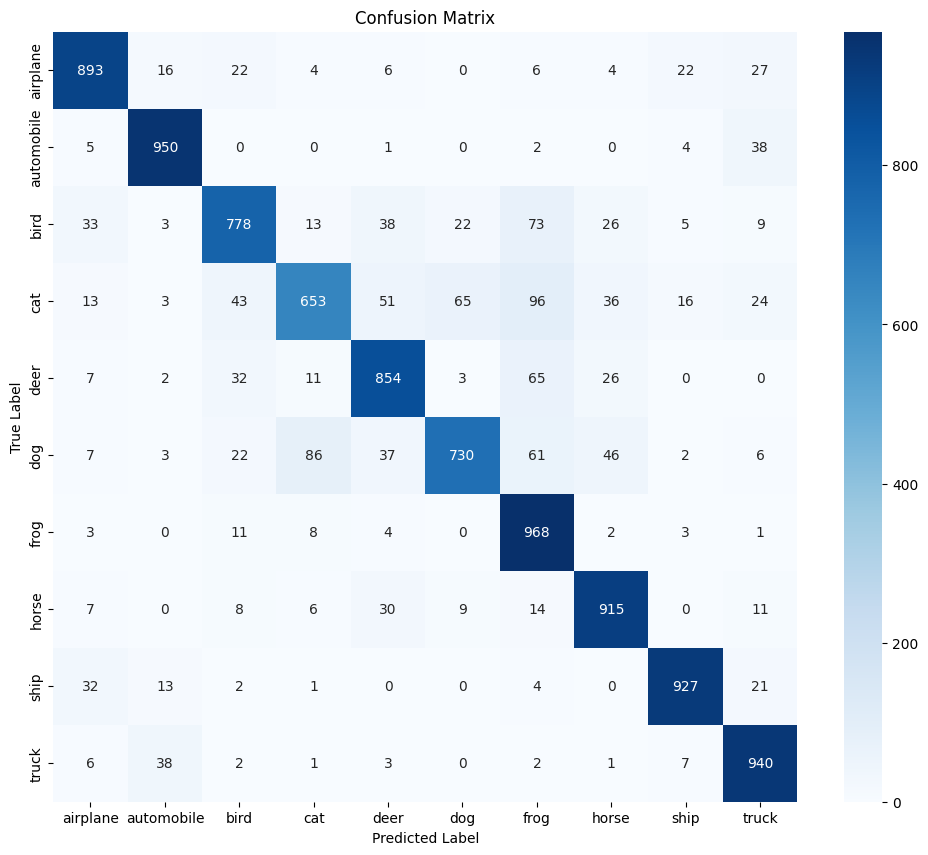

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Making predictions on the test images
test_predictions = model.predict(test_images)
# Converting predictions classes from one hot encoded to integers
predicted_classes = np.argmax(test_predictions, axis=1)
# Converting test labels from one hot encoded to integers
true_classes = np.argmax(test_labels, axis=1)

# Generating the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Loading class labels for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

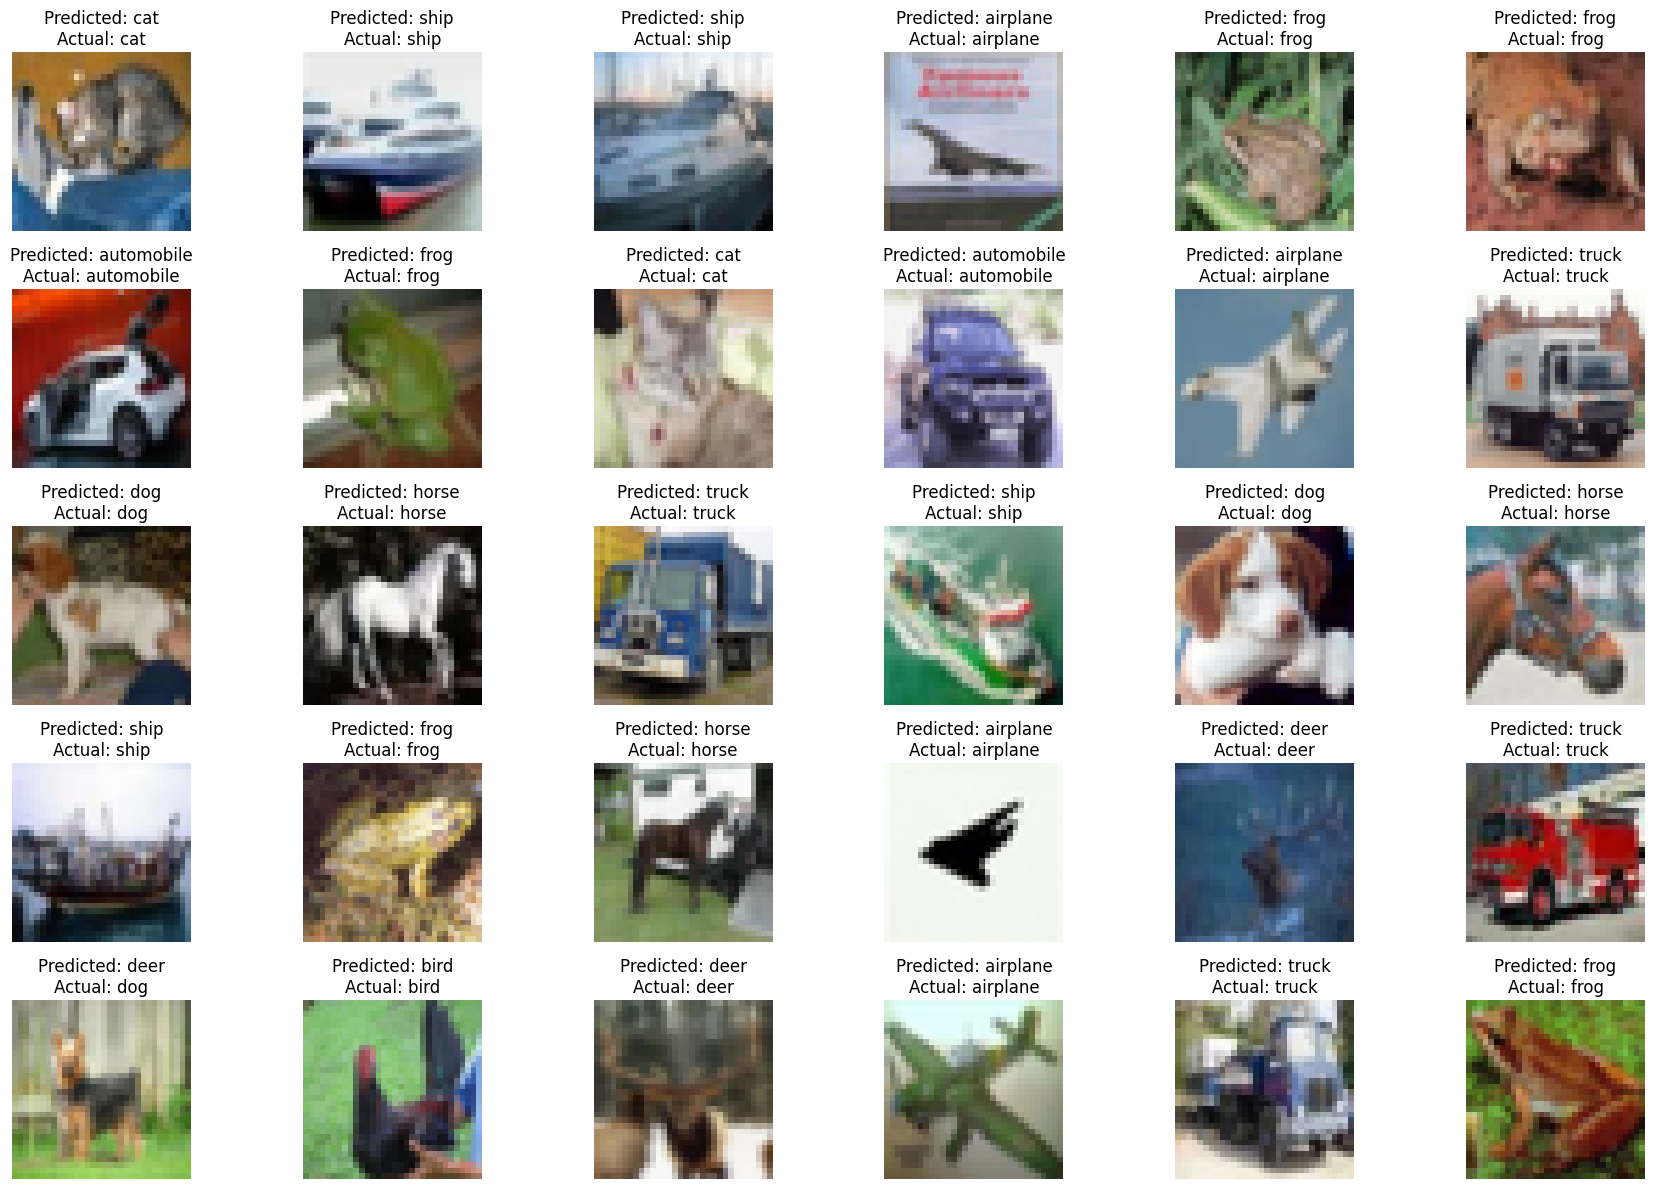

In [10]:
# Displaying some images with predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
if test_labels.ndim > 1:  # Check if test_labels is one-hot encoded
    true_labels = np.argmax(test_labels, axis=1)
else:
    true_labels = test_labels  # If test_labels is already in integer form

plt.figure(figsize=(18, 12))
for i in range(30):  # Display the first 30 images from the test set
    plt.subplot(5, 6, i + 1)
    plt.imshow(test_images[i])
    plt.title(f'Predicted: {class_names[predicted_classes[i]]}\nActual: {class_names[true_labels[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
model.save('/content/drive/MyDrive/Colab Notebooks/h5/Level1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# Load the model
model = load_model('/content/drive/MyDrive/Colab Notebooks/h5/Level1.h5')  # Replace with the actual path to your model file

# Load the CIFAR-10 test dataset
(_, _), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
test_images = test_images.astype('float32') / 255.0

# Ensure that the test labels are in the correct format
test_labels = test_labels.squeeze()  # Remove unnecessary dimensions if present

# Convert labels to one-hot encoding
test_labels = to_categorical(test_labels, 10)  # Convert labels to one-hot, assuming 10 classes

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_images, test_labels, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 [==============================] - 1s 4ms/step - loss: 0.4217 - accuracy: 0.8608
Test Loss: 0.4217478036880493
Test Accuracy: 0.86080002784729
